In [ ]:
import csv

# Provided data after 1-hour immersion
# Provided data after 1-hour immersion
data_1_hour = {
    'CPEpor_F': 4.7 * 10**(-8),  # Use ** for exponentiation
    'CPEpor_n': 0.82,
    'Rpor': 300,
    'CPEb_F': 2.5 * 10**(-6),  # Use ** for exponentiation
    'CPEb_n': 0.81,
    'Rb': 2.7 * 10**(5)  # Use ** for exponentiation
}

# Provided data after 28 days
data_28_days = {
    'CPEpor_F': 4.8 * 10**(-4),  # Use ** for exponentiation
    'CPEpor_n': 0.84,
    'Rpor': 37,
    'CPEb_F': 6.0 * 10**(-5),  # Use ** for exponentiation
    'CPEb_n': 0.92,
    'Rb': 7.7 * 10**(3)  # Use ** for exponentiation
}

# Calculate per hour change for each parameter
per_hour_change = {}
for key, value_1_hour in data_1_hour.items():
    value_28_days = data_28_days[key]
    per_hour_change[key] = (value_28_days - value_1_hour) / (28 * 24)

# Calculate per hour values for each parameter over 28 days
per_hour_values_over_28_days = {}
for key, value_1_hour in data_1_hour.items():
    per_hour_change_value = per_hour_change[key]
    per_hour_values_over_28_days[key] = [value_1_hour + i * per_hour_change_value for i in range(28 * 24 + 1)]

# Save the data to a CSV file
csv_file_path = 'cepmod.csv'
header = ['Hour'] + list(data_1_hour.keys())

data_to_write = [[hour] + [per_hour_values_over_28_days[key][hour] for key in data_1_hour.keys()] for hour in range(28 * 24 + 1)]

with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(data_to_write)

print(f"Per hour values for 28 days saved to {csv_file_path}")



Per hour values for 28 days saved to cepmod.csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Load the generated CSV data
csv_file_path = 'cepmod.csv'
df = pd.read_csv(csv_file_path)

# Select relevant features as predictors and Rb as the target variable
selected_features = ['CPEpor_F', 'CPEpor_n', 'Rpor', 'CPEb_F', 'CPEb_n']
X = df[selected_features].values
y = df['Rb'].values

# Polynomial Regression Model
degree = 2  # You can adjust the degree of the polynomial
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
model.fit(X, y)

# Print the coefficients of the polynomial equation
coefficients = model.named_steps['linearregression'].coef_
intercept = model.named_steps['linearregression'].intercept_

print("Polynomial Regression Equation:")
equation = f"Rb = {intercept:.4f}"

# Print the coefficients for each feature
for i in range(1, len(selected_features) + 1):
    equation += f" + {coefficients[i]:.4f} * {selected_features[i - 1]}"

print(equation)




Polynomial Regression Equation:
Rb = -29200.9171 + -0.0007 * CPEpor_F + -0.0293 * CPEpor_n + 385.7504 * Rpor + -0.0001 * CPEb_F + -0.1613 * CPEb_n


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Load the generated CSV data
csv_file_path = 'cepmod.csv'
df = pd.read_csv(csv_file_path)

# Select relevant features as predictors and Rb as the target variable
selected_features = ['CPEpor_F', 'CPEpor_n', 'Rpor', 'CPEb_F', 'CPEb_n']
X = df[selected_features].values
y = df['Rb'].values

# Polynomial Regression Model
degree = 2  # You can adjust the degree of the polynomial
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
model.fit(X, y)

# Get the coefficients of the polynomial equation
coefficients = model.named_steps['linearregression'].coef_
intercept = model.named_steps['linearregression'].intercept_

# Change the signs of coefficients
positive_coefficients = [-coef for coef in coefficients]
positive_intercept = abs(intercept)

# Print the polynomial regression equation with positive coefficients and intercept
print("Polynomial Regression Equation:")
equation = f"Rb = {positive_intercept:.4f}"
for i, coef in enumerate(positive_coefficients[:len(selected_features)]):
    equation += f" + {coef:.4f} * {selected_features[i]}"

print(equation)


Polynomial Regression Equation:
Rb = 29200.9171 + -0.0000 * CPEpor_F + 0.0007 * CPEpor_n + 0.0293 * Rpor + -385.7504 * CPEb_F + 0.0001 * CPEb_n


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the generated CSV data
csv_file_path = 'cepmod.csv'
df = pd.read_csv(csv_file_path)

# Select relevant features as predictors and Rb as the target variable
selected_features = ['CPEpor_F', 'CPEpor_n', 'Rpor', 'CPEb_F', 'CPEb_n']
X = df[selected_features].values
y = df['Rb'].values

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Training set shapes:
X_train: (538, 5)
y_train: (538,)

Testing set shapes:
X_test: (135, 5)
y_test: (135,)


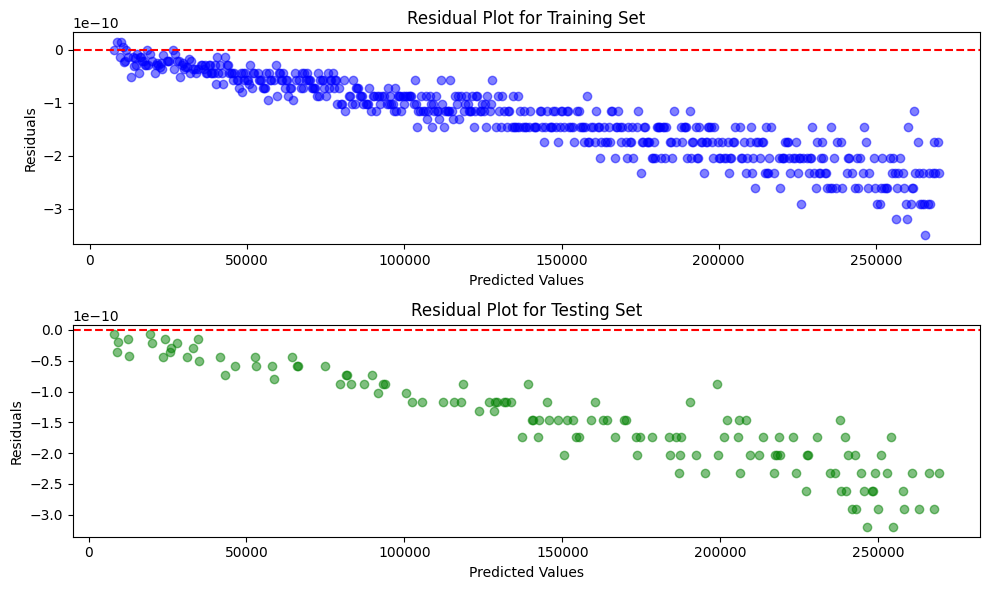

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals for both training and testing sets
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Create a residual plot for the training set
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.scatter(y_train_pred, residuals_train, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Training Set')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Create a residual plot for the testing set
plt.subplot(2, 1, 2)
plt.scatter(y_test_pred, residuals_test, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Testing Set')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


In [ ]:
# Get the coefficients and corresponding feature names
coefficients = model.coef_
feature_names = selected_features

# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients to identify the most impactful features
coefficients_df['Absolute_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the sorted coefficients
print(coefficients_df)


    Feature  Coefficient  Absolute_Coefficient
2      Rpor   997.338223            997.338223
4    CPEb_n    -0.417138              0.417138
1  CPEpor_n    -0.075843              0.075843
0  CPEpor_F    -0.001820              0.001820
3    CPEb_F    -0.000218              0.000218


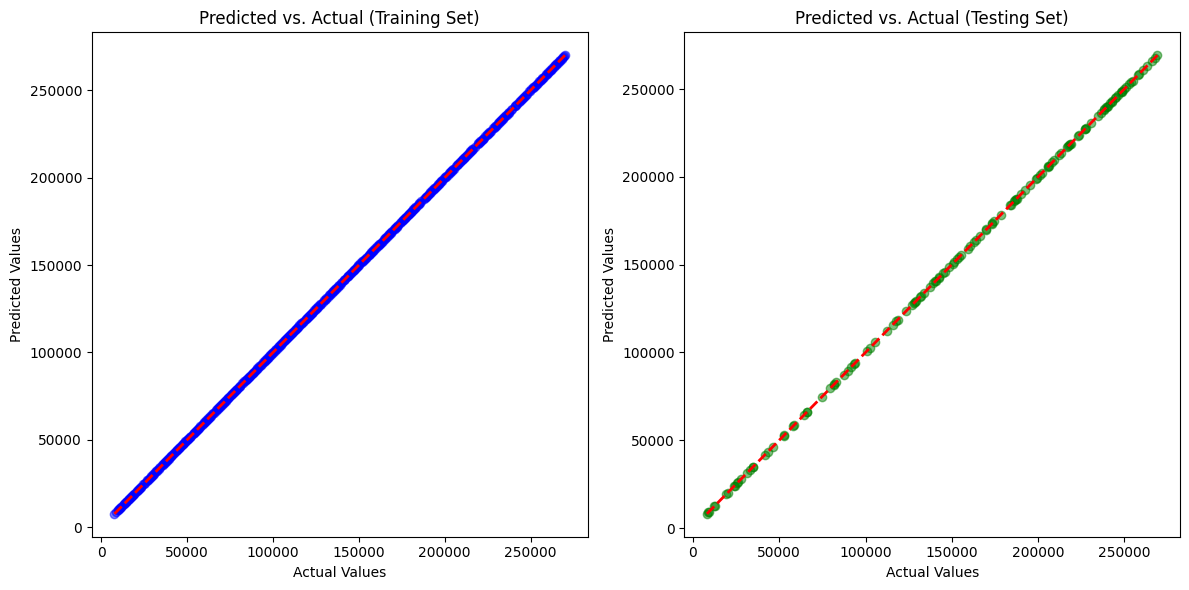

In [ ]:
import matplotlib.pyplot as plt

# Predict the target variable on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Create scatter plots for the training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.title('Predicted vs. Actual (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Create scatter plots for the testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Predicted vs. Actual (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

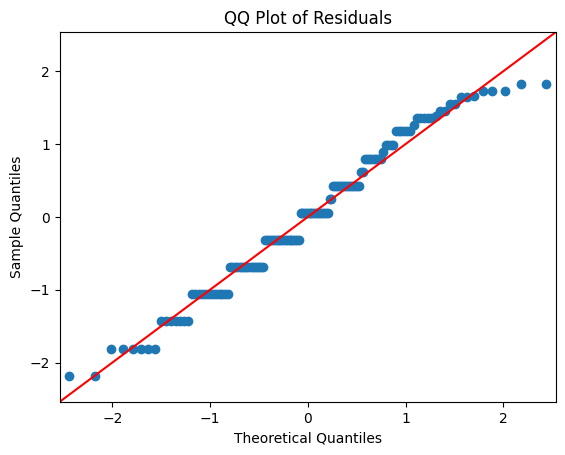

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create a QQ plot using statsmodels
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_test, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()
